In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
os.chdir('..')

### Import functions from custom library
We import the functions `import_data` and `simulate_multiple_durations` from the custom library

In [2]:
from src.data import import_data
from src.simulations import simulate_multiple_durations
from src.plot import show_results

### Import data from Yahoo finance
We import the historical time-series of S&P 500 total return, since 1988.

In [3]:
df = import_data('^SP500TR', starting_date='1988-01-01')

[*********************100%***********************]  1 of 1 completed


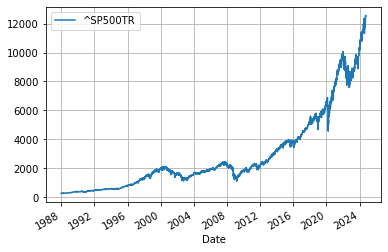

In [4]:
df.plot()
plt.grid()
plt.show()

### Simulate different investments
We simulate different PAC having:
- duration between 1 and 20 years, at intervals of 1 year
- 100 simulations per each duration

In the results are contained (per each duration):
- 1st column, the minimum net return
- 2nd column, the maximum net return
- 3rd column, the median net return
- 4th column, the probability of having a positive return
- 5th column, the probability of having a positive return accounting for the inflation

In [5]:
years_grid = np.arange(1, 20.1, 1)

results = simulate_multiple_durations(data = df,
                                      years_grid = years_grid,
                                      n_simulations = 100)

100%|███████████████████████████████████████████| 20/20 [00:07<00:00,  2.63it/s]


In [6]:
print('Shape of results', results.shape)
print(results.shape[0], 'denotes the number of periods considered in the simulations.')
print(results.shape[1], 'denotes the total number of information for each period.')

Shape of results (20, 5)
20 denotes the number of periods considered in the simulations.
5 denotes the total number of information for each period.


### Show results

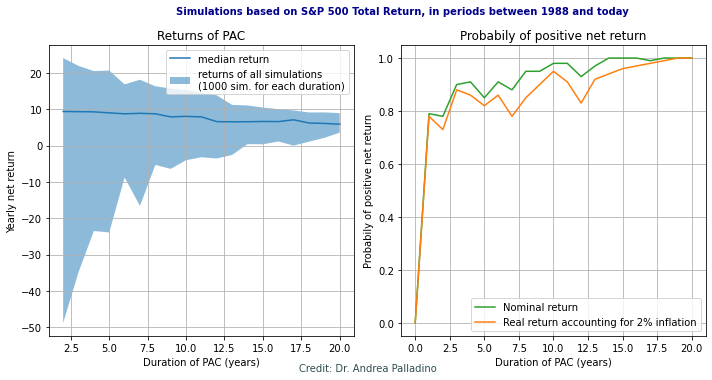

In [9]:
show_results(years_grid,
             results, 
             title="Simulations based on S&P 500 Total Return, in periods between 1988 and today",
             save_figure = "results/QuickStart.png")

#